In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

%matplotlib inline

In [74]:
dataset = pd.read_json("../../Datasets/Sarcasm_Headlines_Dataset.json", lines=True)
dataset.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [3]:
print(dataset.head())

print(dataset.info())

print(dataset.describe())

                                        article_link  \
0  https://www.huffingtonpost.com/entry/versace-b...   
1  https://www.huffingtonpost.com/entry/roseanne-...   
2  https://local.theonion.com/mom-starting-to-fea...   
3  https://politics.theonion.com/boehner-just-wan...   
4  https://www.huffingtonpost.com/entry/jk-rowlin...   

                                            headline  is_sarcastic  
0  former versace store clerk sues over secret 'b...             0  
1  the 'roseanne' revival catches up to our thorn...             0  
2  mom starting to fear son's web series closest ...             1  
3  boehner just wants wife to listen, not come up...             1  
4  j.k. rowling wishes snape happy birthday in th...             0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  26709 non-null  object
 1   headline  

In [4]:
print(dataset['is_sarcastic'].value_counts())

is_sarcastic
0    14985
1    11724
Name: count, dtype: int64


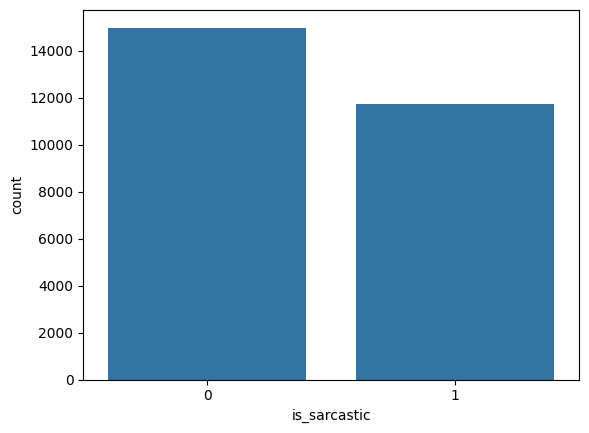

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

#plot the distribution of labels
sns.countplot(x='is_sarcastic', data=dataset)
plt.show()

0    former versace store clerk sues over secret 'b...
1    the 'roseanne' revival catches up to our thorn...
2    mom starting to fear son's web series closest ...
3    boehner just wants wife to listen, not come up...
4    j.k. rowling wishes snape happy birthday in th...
Name: headline, dtype: object


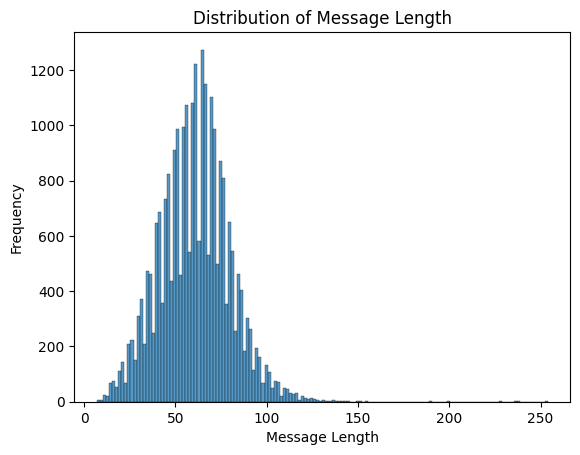

In [6]:
print(dataset['headline'].head())

#calculate the length of each message
dataset['message_length'] = dataset['headline'].apply(len)

#visualize the distribution of message lengths
sns.histplot(dataset['message_length'])
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.title('Distribution of Message Length')
plt.show()

In [8]:
import text_mining_utils as tmu

In [9]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sarah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
sarcastic_docs = list(dataset.headline[dataset.is_sarcastic == 1])
sarcastic_category = ' '.join(sarcastic_docs)
nonsarcastic_docs = list(dataset.headline[dataset.is_sarcastic == 0])
nonsarcastic_category = ' '.join(nonsarcastic_docs)

In [11]:
tmu.print_n_mostFrequent('is_sarcastic', sarcastic_category, 10)
tmu.print_n_mostFrequent('notSarcastic', nonsarcastic_category, 10)

=== 10 most frequent tokens in is_sarcastic ===
	Frequency of "to" is: 0.033955676490836965
	Frequency of "of" is: 0.02566960626823591
	Frequency of "in" is: 0.01437563518342458
	Frequency of "'s" is: 0.014195325049995083
	Frequency of "for" is: 0.011630003606202668
	Frequency of "," is: 0.010507163229846244
	Frequency of "'" is: 0.010392420417663837
	Frequency of "man" is: 0.00934334327771039
	Frequency of "on" is: 0.008646690489460053
	Frequency of "with" is: 0.006999311543126906
=== 10 most frequent tokens in notSarcastic ===
	Frequency of "the" is: 0.028674973379910706
	Frequency of "to" is: 0.025324889627816902
	Frequency of "'s" is: 0.019129102762885056
	Frequency of "'" is: 0.018020710740816848
	Frequency of "a" is: 0.015511261387482642
	Frequency of "of" is: 0.01539294987950907
	Frequency of "in" is: 0.01509405764883899
	Frequency of "," is: 0.014365507836580672
	Frequency of "for" is: 0.011737746975272894
	Frequency of ":" is: 0.011177324042766496


In [13]:
#both datasts
texts = dataset["headline"]
token = "my"

# calculate the percentage of the token in the texts
percentage = tmu.token_percentage(token, texts)

print(f"The token '{token}' appears in the texts with a frequency of {percentage:.2f}%")

The token 'my' appears in the texts with a frequency of 0.11%


In [54]:
#sarcastic
token = "nation"

# calculate the percentage of the token in the texts
percentage = tmu.token_percentage(token, sarcastic_docs)

print(f"The token '{token}' appears in the Sarcastic texts with a frequency of {percentage:.2f}%")

The token 'nation' appears in the Sarcastic texts with a frequency of 0.28%


In [55]:
##non sarcastic

token = "nation"

#calculate the percentage of the specified token in the texts
percentage = tmu.token_percentage(token, nonsarcastic_docs)

print(f"The token '{token}' appears in the non Sarcastic texts with a frequency of {percentage:.2f}%")

The token 'nation' appears in the non Sarcastic texts with a frequency of 0.01%


In [14]:
%pip install nltk.corpus

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement nltk.corpus (from versions: none)
ERROR: No matching distribution found for nltk.corpus


In [56]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

stop_words_removed_dataset = dataset.copy()

#remove stop words
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)


stop_words_removed_dataset['headline'] = dataset['headline'].apply(remove_stopwords)

stop_words_removed_dataset['is_sarcastic'] = dataset['is_sarcastic']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sarah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sarah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:
sarcastic_docs_removed = list(stop_words_removed_dataset.headline[stop_words_removed_dataset.is_sarcastic == 1])
sarcastic_category_removed = ' '.join(sarcastic_docs_removed)
nonsarcastic_docs_removed = list(stop_words_removed_dataset.headline[stop_words_removed_dataset.is_sarcastic == 0])
nonsarcastic_category_removed = ' '.join(nonsarcastic_docs_removed)

In [21]:
tmu.print_n_mostFrequent('is_sarcastic', sarcastic_category_removed, 10)
tmu.print_n_mostFrequent('notSarcastic', nonsarcastic_category_removed, 10)

=== 10 most frequent tokens in is_sarcastic ===
	Frequency of "'s" is: 0.018594464603955082
	Frequency of "," is: 0.013763339273828184
	Frequency of "'" is: 0.0136345092650248
	Frequency of "man" is: 0.012238850836321475
	Frequency of "new" is: 0.00890000644150044
	Frequency of ":" is: 0.008116290554613189
	Frequency of "area" is: 0.005120992849934511
	Frequency of "report" is: 0.004562729478453181
	Frequency of "n't" is: 0.004229918622377773
	Frequency of "nation" is: 0.0036287119146286473
=== 10 most frequent tokens in notSarcastic ===
	Frequency of "'s" is: 0.02650720923610572
	Frequency of "'" is: 0.024979938391447284
	Frequency of "," is: 0.01990629287359892
	Frequency of ":" is: 0.015488424667581303
	Frequency of "trump" is: 0.012088737024669307
	Frequency of "?" is: 0.00634205689731045
	Frequency of "new" is: 0.0057811947227183694
	Frequency of "n't" is: 0.005703536883159466
	Frequency of "." is: 0.004271181175739691
	Frequency of "donald" is: 0.0039260352221445645


In [ ]:
import text_mining_utils as tmu

In [70]:
#sarcastic
token = "."

#calculate the percentage of the token in the texts
percentage = tmu.token_percentage(token, sarcastic_docs_removed)

print(f"The token '{token}' appears in the Sarcastic texts with a frequency of {percentage:.2f}%")

The token '.' appears in the Sarcastic texts with a frequency of 0.09%


In [71]:
##non sarcastic

token = "."

# cal the percentage of the token in the texts
percentage = tmu.token_percentage(token, nonsarcastic_docs_removed)

print(f"The token '{token}' appears in the non Sarcastic texts with a frequency of {percentage:.2f}%")

The token '.' appears in the non Sarcastic texts with a frequency of 0.43%


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sarah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<Figure size 1000x600 with 0 Axes>

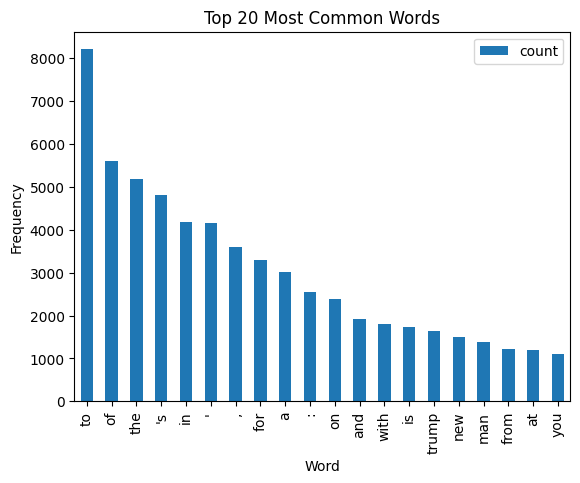

In [76]:
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter

# Download NLTK
nltk.download('punkt')

#tokenize the text data into individual words/tokens
dataset['tokens'] = dataset['headline'].apply(word_tokenize)

word_counts = Counter(word for tokens in dataset['tokens'] for word in tokens)

import matplotlib.pyplot as plt
word_counts_df = pd.DataFrame.from_dict(word_counts, orient='index', columns=['count'])

word_counts_df = word_counts_df.sort_values(by='count', ascending=False)

#plot the top 20 most common words
plt.figure(figsize=(10, 6))
word_counts_df.head(20).plot(kind='bar')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words')
plt.show()


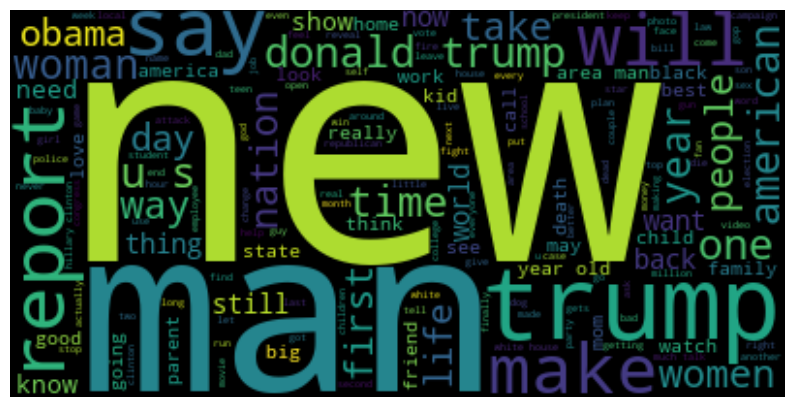

In [79]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_data = ' '.join(dataset['headline'].astype(str))

#generate the word cloud
wordcloud = WordCloud(stopwords=None, background_color='black').generate(text_data)

#display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


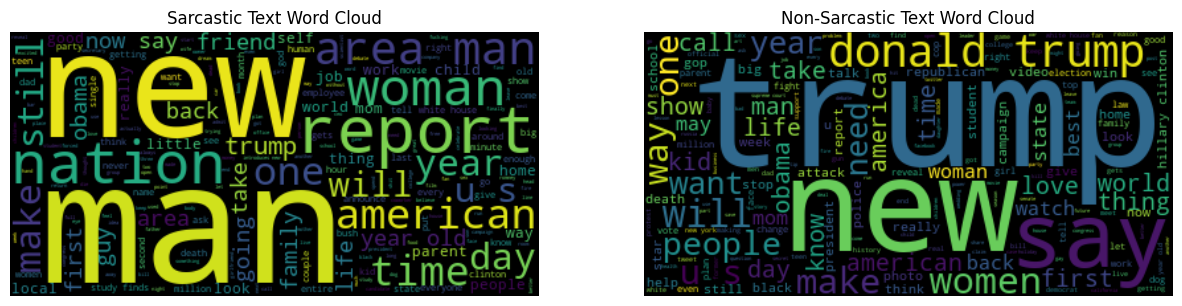

In [81]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


sarcastic_df = dataset[dataset['is_sarcastic'] == 1]
non_sarcastic_df = dataset[dataset['is_sarcastic'] == 0]

sarcastic_text = ' '.join(sarcastic_df['headline'].astype(str))
non_sarcastic_text = ' '.join(non_sarcastic_df['headline'].astype(str))

#generate word clouds for sarcastic and non-sarcastic texts
sarcastic_wordcloud = WordCloud(stopwords=None, background_color='black').generate(sarcastic_text)
non_sarcastic_wordcloud = WordCloud(stopwords=None, background_color='black').generate(non_sarcastic_text)

#display word clouds for sarcastic and non-sarcastic texts
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.imshow(sarcastic_wordcloud, interpolation='bilinear')
plt.title('Sarcastic Text Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(non_sarcastic_wordcloud, interpolation='bilinear')
plt.title('Non-Sarcastic Text Word Cloud')
plt.axis('off')

plt.show()
